<a href="https://colab.research.google.com/github/n1la9jan/churn_prediction/blob/main/main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Visualization

In [1]:
import numpy as np
import pandas as pd
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Churn Prediction/telco.csv")
print(df.isna().sum().sum())
print(df.duplicated().sum())
print(df.describe())
print(df.select_dtypes(include=["number"]).corr())

FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/MyDrive/Colab Notebooks/Churn Prediction/telco.csv'

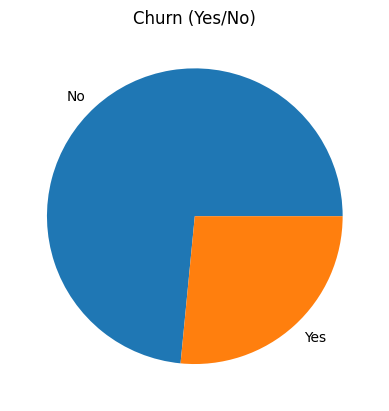

In [ ]:
import matplotlib.pyplot as plt
df["Churn"].value_counts().plot(kind = "pie")
plt.title("Churn (Yes/No)")
plt.ylabel("")
plt.show()

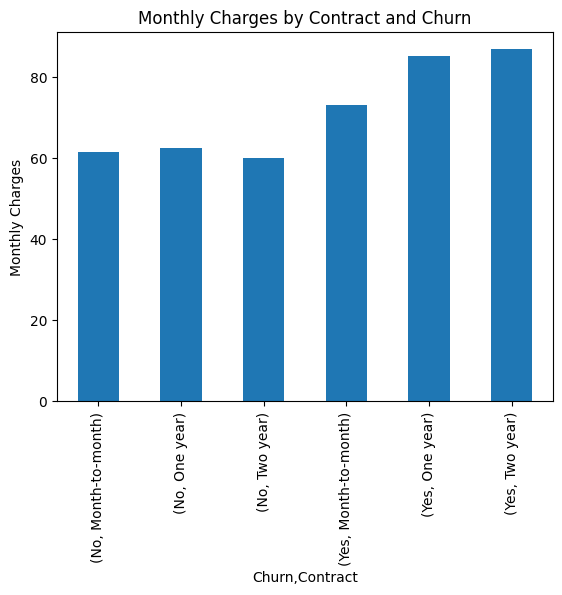

In [ ]:
df.groupby(["Churn", "Contract"])["MonthlyCharges"].mean().plot(kind="bar")
plt.title("Monthly Charges by Contract and Churn")
plt.ylabel("Monthly Charges")
plt.show()

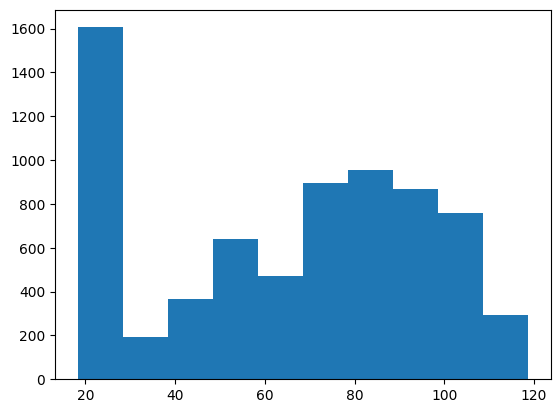

In [ ]:
plt.hist(df["MonthlyCharges"])
plt.show()

# Data Features

In [ ]:
y = df[["Churn"]]
x = df[["gender", "MonthlyCharges", "tenure"]]
x['gender'] = x["gender"].apply(lambda x: 1 if x == "Male" else 0)
y['Churn'] = y["Churn"].apply(lambda x: 1 if x == "Yes" else 0)

/tmp/ipython-input-1143549915.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x['gender'] = x["gender"].apply(lambda x: 1 if x == "Male" else 0)
/tmp/ipython-input-1143549915.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y['Churn'] = y["Churn"].apply(lambda x: 1 if x == "Yes" else 0)


In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [ ]:
from sklearn.preprocessing import StandardScaler as scaler
x_train = scaler().fit_transform(x_train)
x_test = scaler().fit_transform(x_test)

In [ ]:
x_train

array([[ 0.99504246,  0.53919825,  0.75622952],
       [ 0.99504246,  1.37154454,  0.47167481],
       [-1.00498224, -1.50262526,  0.14646941],
       ...,
       [-1.00498224,  0.14711498,  1.569243  ],
       [ 0.99504246,  1.04425468, -0.01613328],
       [-1.00498224, -0.9992302 , -0.91044811]])

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
log_model = LogisticRegression()
def performace(preds):
  print(f"Accuracy: {accuracy_score(y_test, preds)}")


log_model.fit(x_train, y_train)
y_pred = log_model.predict(x_test)
performace(y_pred)

Accuracy: 0.7863733144073811


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
from sklearn.svm import SVC
svm = SVC()
param_grid = {
    "C" : [0.01, 0.1, 0.5, 1],
    "kernel" : ["linear", "rbf", "poly"]
}
gridsvc = GridSearchCV(svm, param_grid, cv = 5, scoring='accuracy')


In [ ]:
gridsvc.fit(x_train, y_train)

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.01, 0.1, 0.5, 1],
                         'kernel': ['linear', 'rbf', 'poly']},
             scoring='accuracy')

In [ ]:
gridsvc.best_params_

{'C': 1, 'kernel': 'poly'}

In [ ]:
y_pred = gridsvc.predict(x_test)
performace(y_pred)

Accuracy: 0.7892122072391767


In [ ]:
from sklearn.tree import DecisionTreeClassifier
grid_params = {
    "criterion": ["gini", "entropy"],
    "splitter" : ["best", "random"],
    "max_depth" : [None, 10, 20, 30],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf" : [1, 2, 4]

}

grid_tree = GridSearchCV(DecisionTreeClassifier(), grid_params, cv = 5, scoring="accuracy")
grid_tree.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 10, 20, 30],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'splitter': ['best', 'random']},
             scoring='accuracy')

In [ ]:
grid_tree.best_params_


{'criterion': 'entropy',
 'max_depth': 10,
 'min_samples_leaf': 2,
 'min_samples_split': 10,
 'splitter': 'random'}

In [ ]:
y_pred = grid_tree.predict(x_test)
performace(y_pred)

Accuracy: 0.7806955287437899


In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc_model = RandomForestClassifier()


In [ ]:
param_grid = {
    "n_estimators" : [32, 64, 128, 256],
    "max_features": [2,3,4],
    "bootstrap": [True, False],
}

In [ ]:
grid_rfc = GridSearchCV(rfc_model, param_grid, cv = 5, scoring="accuracy")
grid_rfc.fit(x_train, y_train)
grid_rfc.best_params_
y_pred = grid_rfc.predict(x_test)
performace(y_pred)

/usr/local/lib/python3.12/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.12/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.12/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.12/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example usi

Accuracy: 0.7487579843860894


In [ ]:
best_model = gridsvc.best_estimator_

In [ ]:
import joblib
joblib.dump(best_model, "model.pkl")
joblib.dump(scaler, "scaler.pkl")

['scaler.pkl']